Desafio 14: Análise de Geração de Energia Solar

📂 Dataset: Leitura diária de painéis solares de uma fazenda, com colunas:
Data, Painel_ID, Regiao, Horas_Sol, Energia_Gerada_kWh, Temperatura_C, Umidade_Relativa.

🎯 Atividades:

Qual painel teve a maior média de geração de energia?

Existe correlação entre Horas_Sol e Energia_Gerada_kWh?

Em quais dias a geração foi abaixo de 5 kWh?

Qual região teve melhor desempenho médio de geração por painel?

Crie um gráfico de dispersão relacionando Horas_Sol e Energia_Gerada_kWh, colorindo por região.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#testando o dataframe
df = pd.read_csv("dia_14_geracao_energia_solar.csv")
df.head()

,Data,Painel_ID,Regiao,Horas_Sol,Energia_Gerada_kWh,Temperatura_C,Umidade_Relativa
0,2024-03-12,P05,Leste,8.2,7.91,37.3,48.0
1,2024-03-13,P02,Sul,3.5,7.64,26.6,75.5
2,2024-03-08,P04,Leste,8.9,11.89,31.1,48.3
3,2024-03-07,P02,Sul,5.3,9.43,31.8,81.9
4,2024-03-11,P06,Norte,6.1,10.94,37.0,48.7


In [33]:
#Qual painel teve a maior média de geração de energia?
mediaPainel = df.groupby("Painel_ID")["Energia_Gerada_kWh"].mean().sort_values(ascending=False)
print(f"O painel com maior média de geração foi o {painel.idxmax()} com uma geração de {painel.max():.2f} kWh")

O painel com maior média de geração foi o P01 com uma geração de 8.93 kWh


In [14]:
#Existe correlação entre Horas_Sol e Energia_Gerada_kWh?
corrHrsEnergia = df["Horas_Sol"].corr(df["Energia_Gerada_kWh"])
print(f"A correlação entre Horas_Sol e Energia_Gerada_kWh é de: {corrHrsEnergia:.2f}")

A correlação entre Horas_Sol e Energia_Gerada_kWh é de: 0.12


In [24]:
#Em quais dias a geração foi abaixo de 5 kWh?
df["Data"] = pd.to_datetime(df["Data"])
diaMenor5 = df.groupby("Data")["Energia_Gerada_kWh"].sum()
print(f"Dias onde a geração foi abaixo de 5 kWh \n\n{diaMenor5[diaMenor5 < 5].apply(lambda x: f"{x:.2f} kWh").to_string()}")

Dias onde a geração foi abaixo de 5 kWh 

Data
2024-03-20    3.69 kWh


In [34]:
#Qual região teve melhor desempenho médio de geração por painel?
mediaPainel = df.groupby(["Painel_ID", "Regiao"])["Energia_Gerada_kWh"].mean().reset_index()
regiao = mediaPainel.groupby("Regiao")["Energia_Gerada_kWh"].mean()
print(f"A região com melhor desempenho médio por painel foi: {regiao.idxmax()}, com {regiao.max():.2f} kWh.")

A região com melhor desempenho médio por painel foi: Norte, com 7.19 kWh.


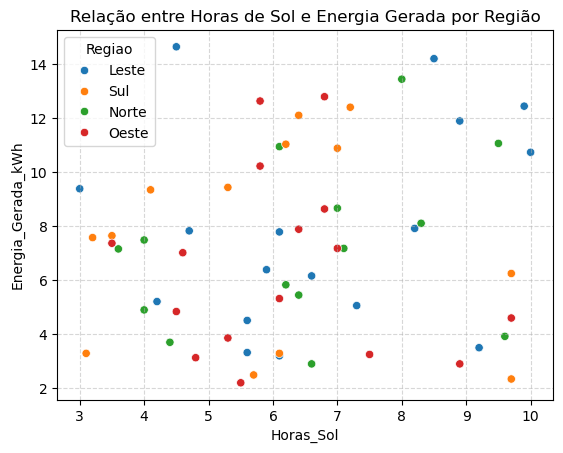

In [44]:
#Crie um gráfico de dispersão relacionando Horas_Sol e Energia_Gerada_kWh, colorindo por região.
sns.scatterplot(data=df, x="Horas_Sol", y="Energia_Gerada_kWh", hue="Regiao")
plt.grid(True, linestyle="--", alpha=0.5)
plt.title("Relação entre Horas de Sol e Energia Gerada por Região")

plt.show()